In [1]:
#Problem 4
"-----Problem 4-----"
from numpy import *
set_printoptions(precision=4)

X=mat("5. 0. 9. 3.; 3. 6. 8. 9.; 4. 4. 9. 6.; 0. 3. 1. 8.; 2. 8. 2. 3.")
y=mat("20. 17. 32. 10. 12.").T

def backsub(X, y):
    l = shape(X)  
    n = l[1]
    b = zeros((n,1))
    b[n-1, 0] = y[n-1, 0]/X[n-1, n-1]
    for j in range(n-1,0,-1):
        b[j-1,0] = (y[j-1,0] - dot(X[j-1, range(j,n)], b[range(j,n),0]))/X[j-1, j-1]
    return b

def house(x):
    m = size(x)
    mu = linalg.norm(x)
    v = x.copy()
    if mu != 0:
        c = x[0] + sign(x[0])*mu
        v[1:m+1] = v[1:m+1]/c
    v[0] = 1
    return v

def rowhouse(X,v):
    X = mat(X)
    v = mat(v)
    X = X - 2*v*v.T/(v.T*v)*X
    return X

def householder(X0):
    X = mat(X0.copy())
    m, n = shape(X)
    v = mat(zeros((m,1)))
    for j in range(1, n+1):
        v[j-1:m] = house(X[j-1:m,j-1])
        X[j-1:m,j-1:n] = rowhouse(X[j-1:m,j-1:n], v[j-1:m])
    return X

def multilinreg(X0,y0):
    X = X0.copy()
    y = y0.copy()
    m, n = shape(X0)
    for j in range(1,n+1):
        v = house(X[j-1:m,j-1])
        X[j-1:m,j-1:n] = rowhouse(X[j-1:m,j-1:n], v)
        beta = -2.*(v.T*y[j-1:m])/(v.T*v)
        y[j-1:m] = y[j-1:m] + v*beta

    b = backsub(X,y)
    return b

print("b=")
print(multilinreg(X,y))

b=
[[2.4413]
 [0.3949]
 [0.9165]
 [0.7156]]


-----Problem 5-----
X=
[[15. 16. 12. 14. 13. 15. 16. 21. 12. 11. 19. 14. 13. 14. 16. 17. 12. 16.]
 [13. 11. 13. 12.  9. 14. 12. 16.  9.  8. 15. 13. 15. 13. 12. 16. 11.  9.]]
-----Part (a)-----


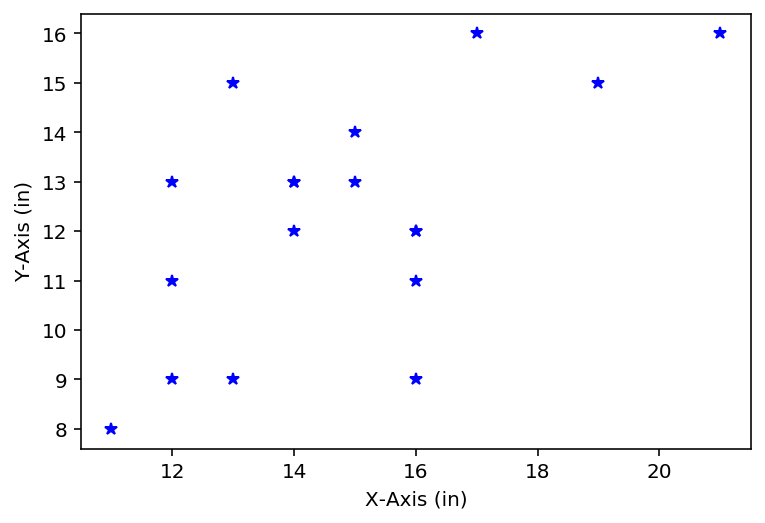

-----Part (b)-----
2
18
C=
[[6.6536 3.7712]
 [3.7712 5.9771]]
U1=
[[-0.738  -0.6748]
 [-0.6748  0.738 ]]


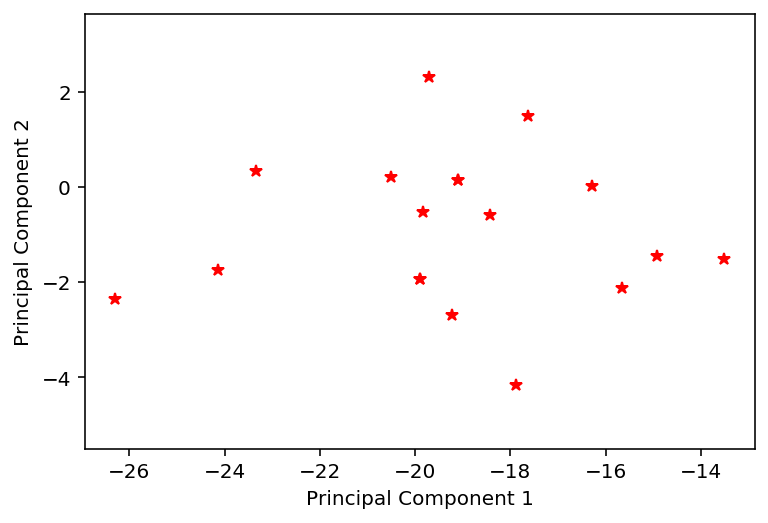

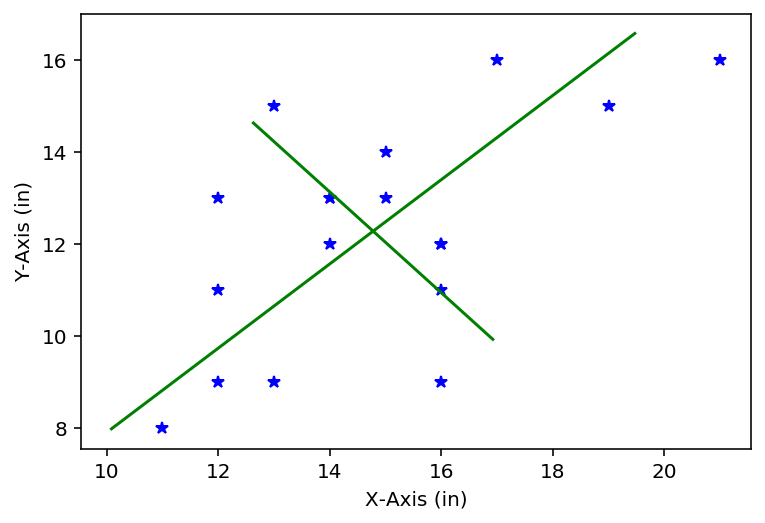

total_var_x = 12.63 total_var_Z = 12.63 Ratio is: 1.0000


In [3]:
#Problem 5
from matplotlib import pyplot
import scipy
print("-----Problem 5-----")
X=mat("15. 16. 12. 14. 13. 15. 16. 21. 12. 11. 19. 14. 13. 14. 16. 17. 12. 16.; 13. 11. 13. 12. 9. 14. 12. 16. 9. 8. 15. 13. 15. 13. 12. 16. 11. 9.")
print("X=")
print(X)

x=X

#Part a
print("-----Part (a)-----")

## plot the raw data
pyplot.figure(0)
pyplot.plot(x[0,:], x[1,:], 'b*')
pyplot.xlabel('X-Axis (in)')
pyplot.ylabel('Y-Axis (in)');
pyplot.show()

#Part b
print("-----Part (b)-----")
#### Perform the PCA analysis ###
m, n = shape(x)
print(m)
print(n)

# 1. Compute sample covariance
C = cov(x)
print("C=")
print(C)

# 2. SVD on C
U, S, Vh = linalg.svd(C)
V = Vh.T

# 3. select the first 2 columns of U
U1 = U[:,0:2]
print("U1=")
print(U1)

# 4. Define Z 
Z = U1.T*x;

## plot the transformed data
pyplot.figure(2)
pyplot.plot(Z[0,:], Z[1,:], 'r*')
pyplot.axis([-110, -85, -1, 6])
pyplot.axis('equal')
pyplot.xlabel('Principal Component 1')
pyplot.ylabel('Principal Component 2')

## add the principal directions
pyplot.figure(1)
pyplot.plot(x[0,:], x[1,:], 'b*')
pyplot.xlabel('X-Axis (in)')
pyplot.ylabel('Y-Axis (in)');
m_x = x.mean(axis=1)
TP1 = array(2*sqrt(S[0])*mat([-U[0, 0], U[0, 0]])+m_x[0])
TP2 = array(2*sqrt(S[0])*mat([-U[1, 0], U[1, 0]])+m_x[1])
TP3 = array(2*sqrt(S[1])*mat([-U[0, 1], U[0, 1]])+m_x[0])
TP4 = array(2*sqrt(S[1])*mat([-U[1, 1], U[1, 1]])+m_x[1])      
pyplot.plot(TP1[0], TP2[0], 'g-')
pyplot.plot(TP3[0], TP4[0], 'g-')  

pyplot.show()

## compare the covariance and the total variance
Cov_x = cov(x)
Cov_Z = cov(Z)
Total_var_x = trace(Cov_x)
Total_var_Z = trace(Cov_Z)
Ratio=Total_var_x/Total_var_Z

#print('total_var_x = ' + repr(Total_var_x), 'total_var_z = ' + repr(Total_var_Z))

print('total_var_x = %5.2f' %Total_var_x, 'total_var_Z = %5.2f' %Total_var_Z, 'Ratio is: %2.4f' %Ratio) 

In [9]:
#Problem 5
print("-----Problem 5-----")
set_printoptions(precision=4)

#Importing Data
import scipy.io
mat_contents = scipy.io.loadmat('hw3_3_data.mat')
X = mat(mat_contents['X'])
y = mat(mat_contents['y'])

#Part a
print("----Part a----")

#### Perform the PCA analysis ###
m, n = shape(X)
print('X-m=', m, 'X-n=', n) #200x200

# i. Compute sample covariance
C = cov(X.T)
a, b = shape(C)
print('C-m=', a, 'C-n=', b) #100x100

# ii. SVD on C
U, S, Vh = linalg.svd(C)
V = Vh.T

# iii. select the first D=10 U
U1 = V[:,0:10]
o, p = shape(U1)
print('C-m=', o, 'C-n=', p) #100x10

# iv. Define X3 (Prompt's X1) 
X3 = X*U1;
q, r = shape(X3)
print('X3-m=', q, 'X3-n=', r) #200x10


#Part b
print("----Part b----")
b=multilinreg(X3,y)
print('b=')
print(b)

#Part c
print("----Part c----")
E=y-X3*b
print("SSE = ",linalg.norm(E))

-----Problem 5-----
----Part a----
X-m= 200 X-n= 100
C-m= 100 C-n= 100
C-m= 100 C-n= 10
X3-m= 200 X3-n= 10
----Part b----
b=
[[ 1.0742]
 [-1.7688]
 [ 0.104 ]
 [ 0.3633]
 [-0.3864]
 [ 0.4965]
 [ 0.8623]
 [ 1.3953]
 [-0.0185]
 [ 1.0064]]
----Part c----
SSE =  33.628167484025035
